### Install Dependency

In [1]:
%pip install -q matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)

## Helper Function

### Random Board Function

In [3]:
def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

### Conflicts Board Function

In [4]:
def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

### Show Board Function

In [5]:
# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

Board with 4 conflicts.


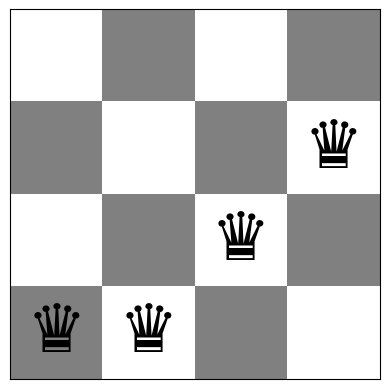

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [6]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

### Objective and Generate Neighbors Function

In [165]:
import random

# objective of the problem (find the highest value = 0)
def objective(board):
  return -conflicts(board)

def generate_neighbors(board):
  n = len(board)
  neighbors = []
  for col in range(n):
    for row in range(n):
      if board[col] != row:
        new_board = board[:]
        new_board[col] = row
        neighbors.append(new_board)

  return neighbors


### Steepest-ascend Hill Climbing

Board with 0 conflicts.


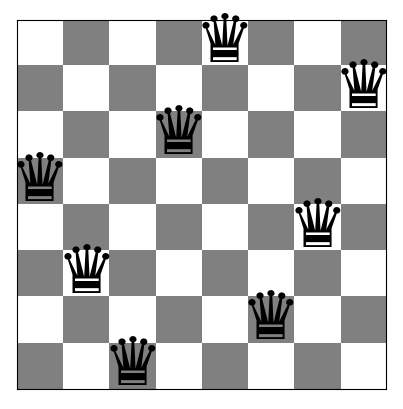

Queens (left to right) are at rows: [3, 5, 7, 2, 0, 6, 4, 1]
Number of conflicts: 0


In [166]:
def steepest_ascend_hill_climbing(n, max_iter=1000):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)

    best_neighbors = max(neighbors, key=objective)
    best_objective = objective(best_neighbors)

    if best_objective <= current_objective:
      return current

    current = best_neighbors

  return current


solution = steepest_ascend_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")

### Stochastic Hill Climbing

Board with 1 conflicts.


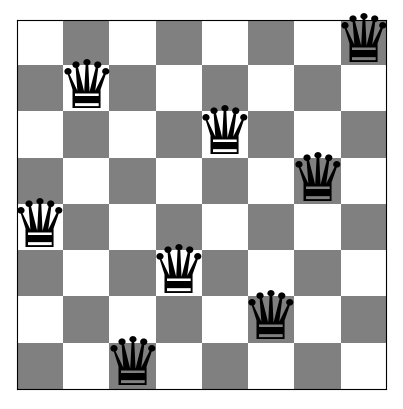

Queens (left to right) are at rows: [4, 1, 7, 5, 2, 6, 3, 0]
Number of conflicts: 1


In [163]:
def stochastic_hill_climbing(n, max_iter=100):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)

    best_neighbor = random.choice(neighbors)
    best_objective = objective(best_neighbor)

    if best_objective > current_objective:
      current = best_neighbor

  return current

solution = stochastic_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")


### First Hill Climbing

Board with 2 conflicts.


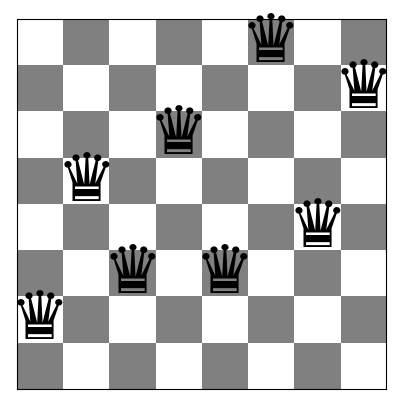

Queens (left to right) are at rows: [6, 3, 5, 2, 5, 0, 4, 1]
Number of conflicts: 2


In [179]:
def first_hill_climbing(n, max_iter=100):

  current = [random.randint(0, n-1) for _ in range(n)]

  for _ in range(max_iter):
    current_objective = objective(current)
    neighbors = generate_neighbors(current)
    random.shuffle(neighbors)

    for neighbor in neighbors:
      neighbor_objective = objective(neighbor)
      if neighbor_objective > current_objective:
        current = neighbor
        break

  return current

solution = first_hill_climbing(8)

show_board(solution)
print(f"Queens (left to right) are at rows: {solution}")
print(f"Number of conflicts: {conflicts(solution)}")
